<a href="https://colab.research.google.com/github/raunaksharan/Applied-ML/blob/main/tasks/MarkovChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
def markov_p(data):
    channel_range = np.unique(data)
    channel_bins = np.append(channel_range, 11)
    data_next = np.roll(data, -1)
    matrix = []
    for i in channel_range:
        current_row = np.histogram(data_next[data == i], bins=channel_bins)[0]
        current_row = current_row / np.sum(current_row)
        matrix.append(current_row)
    return np.array(matrix)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df_train = pd.read_csv("sample.csv")


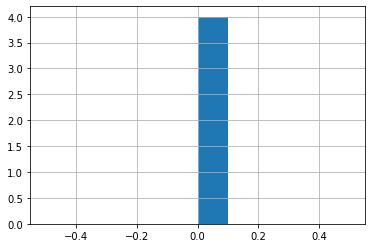

In [7]:
df_train.loc[0:3]['open_channels'].hist()

Training

In [8]:
train_opench = df_train["open_channels"].values.reshape(-1,500000)

In [12]:
def create_axes_grid(numplots_x, numplots_y, plotsize_x=6, plotsize_y=3):
    fig, axes = plt.subplots(numplots_y, numplots_x)
    fig.set_size_inches(plotsize_x * numplots_x, plotsize_y * numplots_y)
    fig.subplots_adjust(wspace=0.05, hspace=0.05)
    return fig, axes
    

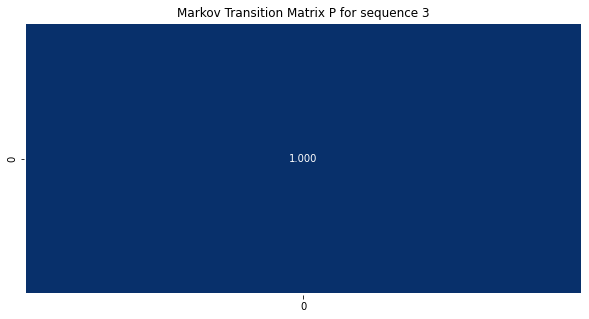

In [13]:
p03 = markov_p(train_opench[3])

fig, axes = create_axes_grid(1,1,10,5)
axes.set_title('Markov Transition Matrix P for sequence 3')
sns.heatmap(
    p03,
    annot=True, fmt='.3f', cmap='Blues', cbar=False,
    ax=axes, vmin=0, vmax=0.5, linewidths=2);

In [16]:
eig_values, eig_vectors = np.linalg.eig(np.transpose(p03))
print("Eigenvalues :", eig_values)

Eigenvalues : [1.]


In [17]:
np.histogram(train_opench[3], bins=[0,1,2,3,4], density=True)[0]

array([1., 0., 0., 0.])